# <center> **Quantum Walks Qibo for 1-dimensional ring graph**

### **Library**

In [20]:
from qibo import gates, models
from matplotlib import pyplot as plt

### **Auxiliar function**

In [8]:
def plot_distribution(final):

    x_arr = list(final.keys())
    y_arr = [dict(final)[j] for j in dict(final).keys()]

    x_arr_final = []
    y_arr_final = []

    while (len(x_arr) > 0):

        x_arr_final.append(min(x_arr))
        y_arr_final.append(y_arr[x_arr.index(min(x_arr))])
        holder = x_arr.index(min(x_arr))
        del x_arr[holder]
        del y_arr[holder]

    plt.plot(x_arr_final, y_arr_final)
    plt.scatter(x_arr_final, y_arr_final)
    plt.gca().set_xticklabels([])
    plt.show()

### **Quantum Walks Qibo Circuit**

In [11]:
def walk_step_qibo(circuit, number_qubits):
    # "Flip" the coin vector
    
    circuit.add(gates.H(number_qubits))

    # Implement the Addition Operator
    
    circuit.add(gates.X(number_qubits))

    for i in range(number_qubits, 0, -1):
        controls = list(range(number_qubits, i-1, -1))
        circuit.add(gates.X(i-1).controlled_by(*controls))
        if i > 1:
            circuit.add(gates.X(i-1))

    circuit.add(gates.X(number_qubits))

    # Implement the Subtraction Operator
    
    for i in range(1, number_qubits + 1):
        controls = list(range(number_qubits, i-1, -1))
        circuit.add(gates.X(i-1).controlled_by(*controls))
        if i < number_qubits:
            circuit.add(gates.X(i))

    return circuit

In [12]:
def initial_state_qibo(circuit, number_qubits):
    
    circuit.add(gates.X(1))
    
    circuit.add(gates.H(number_qubits))
    circuit.add(gates.S(number_qubits))

In [17]:
def generate_walk_qibo(number_qubits, iterator, sample_number):
    
    circuit = models.Circuit(number_qubits + 1)

    initial_state_qibo(circuit, number_qubits)

    for _ in range(iterator):
        walk_step_qibo(circuit, number_qubits)  

    for q in range(number_qubits):
        circuit.add(gates.M(q))

    result = circuit(nshots= sample_number)
    final = result.frequencies(binary=True)

    return final

### **Example Quantum Walks over 1-dimensional ring graph**

![ring graph.png](img/ring%20graph.png)

In [18]:
number_nodes = 7
steps = 30
sample_number = 5000


final = generate_walk_qibo(number_nodes, steps, sample_number)

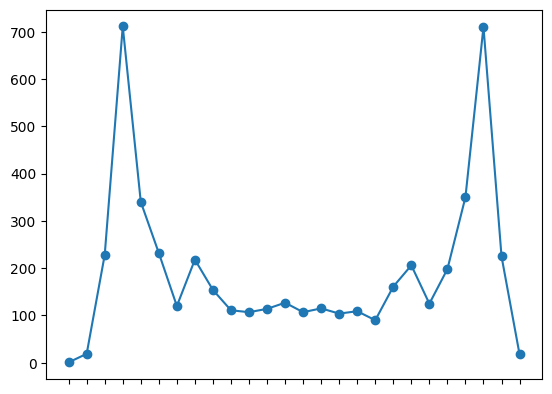

In [21]:
plot_distribution(final)